### Importer les données avec pandas.
on importe les données, et on supprimer la premiére colonne (colonne de ID)

In [ ]:
import pandas as pd
import os

df = pd.read_csv(os.getcwd() + '/../data/raw/dataset-diabete.csv')

df.drop("Unnamed: 0", axis=1, inplace=True)

print(df.sample())


### Examiner les dimensions, types de variables et aperçu des premières lignes.

In [ ]:
print("--- Dimensions:\n", df.shape, "\n\n")

print("--- Data Types:\n", df.dtypes, '\n\n', sep="")

print("--- Colonnes:\n", list(df.columns), "\n\n", sep="")

print("--- Nombre de Colonnes:\n", len(df.columns), '\n\n')

print("--- First 5 columns:")

print(df.head())

### Identifier les valeurs manquantes et doublons.
Dans cette etape, on affiche:
- Le nombre de valeurs manquantes dans chaque colonne
- Les colonne qui contient au moins une valeur manquante
- Les lignes doublons

In [ ]:
print((df == 0).sum(), '\n\n')

print(df[(df == 0).any(axis=1)], '\n\n')

print(df[df.duplicated()])


### Analyser la distribution des variables numériques.

Affichage de statistiques de données sous forme d'une dataframe qui contient:
- La moyenne
- Le médiane
- La variance
- L'écart-type
- Le min
- Le max

La fonction set_option() et utiliser pour afficher tous les colonnes de DataFrame dans une seul ligne

In [ ]:
stats = pd.DataFrame({
    "Moyenne": df.mean(),
    "Mediane": df.median(),
    "Variance": df.var(),
    "Ecart-Type": df.std(),
    "Min": df.min(),
    "Max": df.max(),
})

pd.set_option('display.width', 1000)

print(stats)

### Créer une matrice de corrélation et des visualisations (heatmap, histogrammes, pairplots).

- Matrice de corrélation:

In [ ]:
matrice_corr = df.corr()

print(matrice_corr)

- Heatmap:

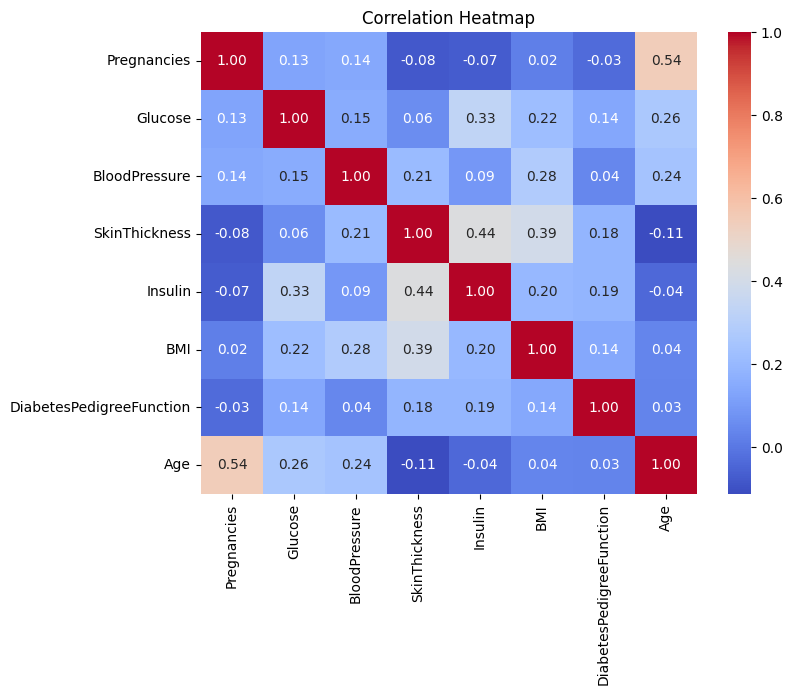

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(8,6))
sb.heatmap(matrice_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- Histogrammes:

In [ ]:
counts = df['Age'].value_counts().sort_index()

plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
plt.bar(counts.index, counts.values)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Bar Plot of Age")

counts = df['Pregnancies'].value_counts().sort_index()

plt.subplot(3, 3, 2)
plt.bar(counts.index, counts.values)
plt.xlabel("Pregnancies")
plt.ylabel("Frequency")
plt.title("Bar Plot of Pregnancies")

plt.subplot(3, 3, 3)
plt.hist(x=df["Glucose"], rwidth=0.9, bins=range(0, round(df["Glucose"].max() + 2), 10))
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.title("Histogram of Glucose")

plt.subplot(3, 3, 4)
plt.hist(x=df["BloodPressure"], rwidth=0.9, bins=range(0, round(df["BloodPressure"].max() + 5), 5))
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")
plt.title("Histogram of BloodPressure")

plt.subplot(3, 3, 5)
plt.hist(x=df["SkinThickness"], rwidth=0.9, bins=range(0, round(df["SkinThickness"].max() + 5), 4))
plt.xlabel("SkinThickness")
plt.ylabel("Frequency")
plt.title("Histogram of SkinThickness")

plt.subplot(3, 3, 6)
plt.hist(x=df["BMI"], rwidth=0.9, bins=range(0, round(df["BMI"].max() + 5), 4))
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("Histogram of BMI")

plt.subplot(3, 3, 7)
plt.hist(x=df["DiabetesPedigreeFunction"], rwidth=0.9)
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Frequency")
plt.title("Histogram of DiabetesPedigreeFunction")

plt.tight_layout()
plt.show()